In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Construction phase

In [2]:
n_inputs = 1
n_hidden1 = 1000
n_hidden2 = 100
n_outputs = 1

In [3]:
with tf.name_scope('placeholders'):
    X = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs))
    y = tf.placeholder(dtype=tf.float32, shape=(None))

In [4]:
with tf.name_scope('layers'):
    hidden1 = tf.contrib.layers.fully_connected(X, n_hidden1, activation_fn=tf.nn.elu)
    hidden2 = tf.contrib.layers.fully_connected(hidden1, n_hidden2, activation_fn=tf.nn.elu)
    output = tf.contrib.layers.fully_connected(hidden2, n_outputs, activation_fn=None)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
with tf.name_scope('loss'):
    loss = tf.losses.mean_squared_error(y, output)

Instructions for updating:
Use tf.cast instead.


In [6]:
learning_rate = 0.01
with tf.name_scope('minimize'):
#     optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:
Use tf.cast instead.


# Execution

In [7]:
init = tf.global_variables_initializer()

3.7258635
0.64672893
0.62145066
0.52815515
0.16152455
0.04879507
0.047754005
0.05088084
0.046679735
0.047112454


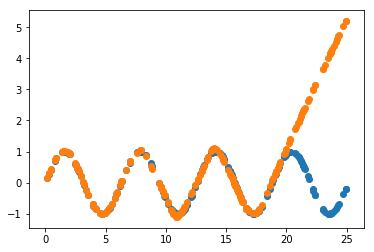

In [8]:
n_epochs = 10000

with tf.Session() as sess:
    init.run()
    for epoch in range(0, n_epochs):
        #generate random value in domain 0,10 and range -1, 1, use that as input to net and sin of that as label
        value = np.random.rand(200, 1) * 20
        label = np.sin(value)
        sess.run(optimizer, feed_dict={X:value, y: label})
        if epoch % 1000 == 0:
            acc = loss.eval(feed_dict={X:value, y: label})
            print(np.sqrt(acc))
    #final predictions and graph plot
    values = np.random.rand(200, 1) * 25
    actual = np.sin(values)
    predictions = output.eval(feed_dict={X: values})
    plt.scatter(values, actual)
    plt.scatter(values, predictions)